# Лабораторная работа №4  
## Машинное обучение  
### Выполнил Тюмин Илья, студент ИВТИИбд-32

1.Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных.   
2.Произвести масштабирование признаков (scaling).  
3.С использованием библиотеки scikit-learn обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков.   
4.Проверить точность модели по тестовой выборке.  
5.Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации. Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).  

In [1]:
# импорты будут здесь
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [2]:
# Код будет здесь
print(" Code be here ")

 Code be here 


1.Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных. 

Для начала, импортируем Набор данных с сайта archive.ics.uci.edu.

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
# metadata 
# print(adult.metadata) <- ugly
# variable information 
print(adult.variables) 

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

Выставим соответствующие значения в переменных и функциях.

In [3]:
df = pd.read_csv("adult.data", sep=", ", header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], engine='python', na_values='?')
cdf = pd.read_csv("adult.test", sep=", ", header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], engine='python', na_values='?')

df = df.drop(columns=['education', 'education-num', 'marital-status', 'relationship', 'race', 'sex', 'native-country'])
cdf = cdf.drop(columns=['education', 'education-num', 'marital-status', 'relationship', 'race', 'sex', 'native-country'])

df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
cdf['workclass'] = cdf['workclass'].fillna(cdf['workclass'].mode()[0])
cdf['occupation'] = cdf['occupation'].fillna(cdf['occupation'].mode()[0])

categorical_columns = ['workclass', 'occupation']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    cdf[col] = le.transform(cdf[col].astype(str))

df['income'] = df['income'].str.replace('.', '', regex=False)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
cdf['income'] = cdf['income'].str.replace('.', '', regex=False)
cdf['income'] = cdf['income'].map({'<=50K': 0, '>50K': 1})

train_df = df.sample(frac = 0.7, random_state = 42)
test_df = df.drop(train_df.index)
vald_df = cdf.sample(random_state = 42)

Y_train = train_df["income"]
X_train = train_df.drop(columns = ["income"])

Y_vald = vald_df["income"]
X_vald = vald_df.drop(columns = ["income"])

Y_test = test_df["income"]
X_test = test_df.drop(columns = ["income"])

2.Произвести масштабирование признаков (scaling).  

Поскольку в наших данных могут отсутствовать некоторые значения, воспользуемся Robust Scaling для увеличения надежности.

In [4]:
# scaler = StandardScaler()
scaler = RobustScaler()
X_trains = scaler.fit_transform(train_df)
X_tests = scaler.transform(test_df)
X_valds = scaler.transform(vald_df)

3.С использованием библиотеки scikit-learn обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков.

Воспользуемся примерами из документации и обучим наши модели.

In [6]:
modo = Perceptron()
modt = MLPClassifier()

modo.fit(X_trains, Y_train)
modt.fit(X_trains, Y_train)

y_traino_pred = modo.predict(X_trains)
y_testo_pred = modo.predict(X_tests)
y_valdo_pred = modo.predict(X_valds)

y_traint_pred = modt.predict(X_trains)
y_testt_pred = modt.predict(X_tests)
y_valdt_pred = modt.predict(X_valds)

4.Проверить точность модели по тестовой выборке.

Теперь проверим точность моделей.

Perceptron: Train: 0.9391918571491247, Test: 0.9395986895986896, valid: 1.0
MLPClassifier: Train: 0.9684552274821216, Test: 0.9714373464373465, valid: 1.0


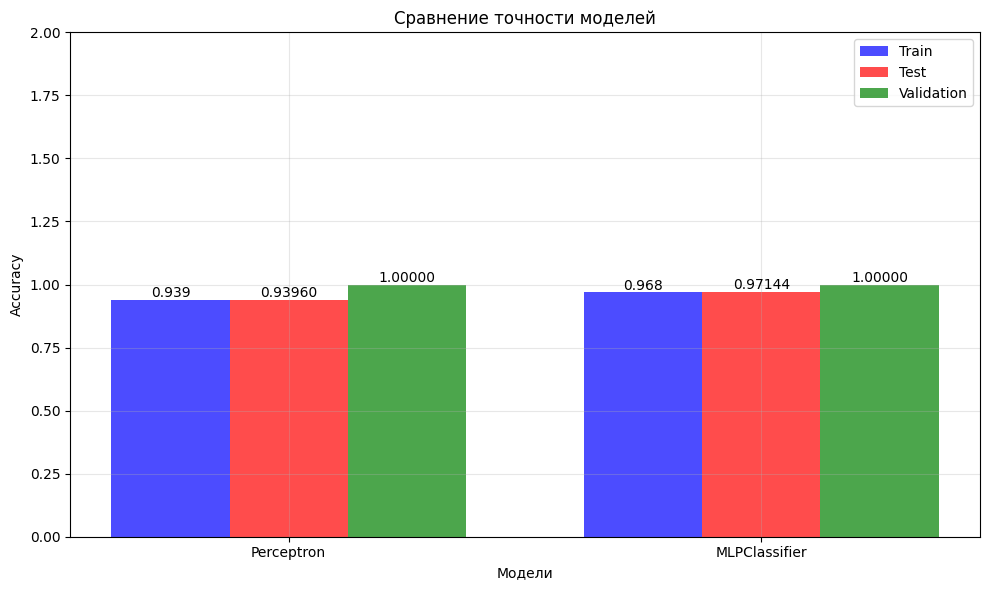

In [7]:
as_traino = accuracy_score(Y_train, y_traino_pred)
as_testo = accuracy_score(Y_test, y_testo_pred)
as_valdo = accuracy_score(Y_vald, y_valdo_pred)
print(f"Perceptron: Train: {as_traino}, Test: {as_testo}, valid: {as_valdo}")

as_traint = accuracy_score(Y_train, y_traint_pred)
as_testt = accuracy_score(Y_test, y_testt_pred)
as_valdt = accuracy_score(Y_vald, y_valdt_pred)
print(f"MLPClassifier: Train: {as_traint}, Test: {as_testt}, valid: {as_valdt}")

models = ['Perceptron', 'MLPClassifier']
train_acc = [as_traino, as_traint]
test_acc = [as_testo, as_testt]
val_acc = [as_valdo, as_valdt]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, train_acc, width, label='Train', color='blue', alpha=0.7)
plt.bar(x, test_acc, width, label='Test', color='red', alpha=0.7)
plt.bar(x + width, val_acc, width, label='Validation', color='green', alpha=0.7)

plt.xlabel('Модели')
plt.ylabel('Accuracy')
plt.title('Сравнение точности моделей')
plt.xticks(x, models)
plt.legend()
plt.grid(True, alpha=0.3)

for i, (train, test, val) in enumerate(zip(train_acc, test_acc, val_acc)):
    plt.text(i - width, train + 0.01, f'{train:.3f}', ha='center', fontsize=10)
    plt.text(i, test + 0.01, f'{test:.5f}', ha='center', fontsize=10)
    plt.text(i + width, val + 0.01, f'{val:.5f}', ha='center', fontsize=10)

plt.ylim(0, 2)
plt.tight_layout()
plt.show()

In [8]:
per_gap = as_traino - as_testo
mlp_gap = as_traino - as_testt

print(f"Perceptron (разница train-test): {per_gap}")
print(f"MLPClassifier (разница train-test): {mlp_gap}")

if per_gap > 0.1:
    print("Perceptron: ovrfit")
else:
    print("Perceptron: no ovrfit")
if mlp_gap > 0.1:
    print("MLP: ovrfit")
else:
    print("MLP: no ovrfit")

Perceptron (разница train-test): -0.00040683244956496445
MLPClassifier (разница train-test): -0.032245489288221796
Perceptron: no ovrfit
MLP: no ovrfit


5.Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации. Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).

Поэксперементируем.


1. Learning rate = 0.0001
 Train Accuracy: 0.9572
 Validation Accuracy: 1.0000

2. Learning rate = 0.001
 Train Accuracy: 0.9572
 Validation Accuracy: 1.0000

3. Learning rate = 0.01
 Train Accuracy: 0.9572
 Validation Accuracy: 1.0000

4. Learning rate = 0.1
 Train Accuracy: 0.9572
 Validation Accuracy: 1.0000

5. Learning rate = 0.5
 Train Accuracy: 0.9572
 Validation Accuracy: 1.0000

6. Learning rate = 1.0
 Train Accuracy: 0.9572
 Validation Accuracy: 1.0000

 Best learning rate: 0.0001
 Validation Accuracy: 1.0000


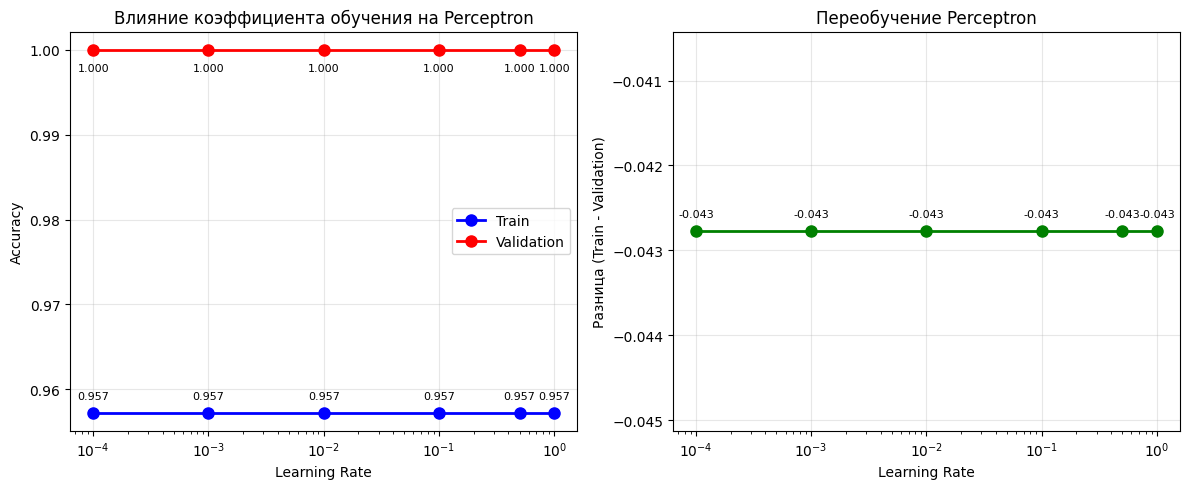

In [9]:
#1 
learn_rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]
prc_val_acc = []
prc_train_acc = []

for i, lr in enumerate(learn_rates, 1):
    print(f"\n{i}. Learning rate = {lr}")
    
    perceptron = Perceptron(eta0=lr, random_state=42, max_iter=1000)
    perceptron.fit(X_trains, Y_train)
    
    y_train_pred = perceptron.predict(X_trains)
    y_val_pred = perceptron.predict(X_valds)
    
    train_acc = accuracy_score(Y_train, y_train_pred)
    val_acc = accuracy_score(Y_vald, y_val_pred)
    
    prc_train_acc.append(train_acc)
    prc_val_acc.append(val_acc)
    
    print(f" Train Accuracy: {train_acc:.4f}")
    print(f" Validation Accuracy: {val_acc:.4f}")

best_lr_idx = np.argmax(prc_val_acc)
best_lr = learn_rates[best_lr_idx]
print(f"\n Best learning rate: {best_lr}")
print(f" Validation Accuracy: {prc_val_acc[best_lr_idx]:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(learn_rates, prc_train_acc, 'bo-', linewidth=2, markersize=8, label='Train')
plt.plot(learn_rates, prc_val_acc, 'ro-', linewidth=2, markersize=8, label='Validation')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Влияние коэффициента обучения на Perceptron')
plt.legend()
plt.grid(True, alpha=0.3)

for i, (lr, train_acc, val_acc) in enumerate(zip(learn_rates, prc_train_acc, prc_val_acc)):
    plt.annotate(f'{train_acc:.3f}', (lr, train_acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    plt.annotate(f'{val_acc:.3f}', (lr, val_acc), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)

plt.subplot(1, 2, 2)
gaps = [train - val for train, val in zip(prc_train_acc, prc_val_acc)]
plt.plot(learn_rates, gaps, 'go-', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Разница (Train - Validation)')
plt.title('Переобучение Perceptron')
plt.grid(True, alpha=0.3)

for i, (lr, gap) in enumerate(zip(learn_rates, gaps)):
    plt.annotate(f'{gap:.3f}', (lr, gap), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.show()


1. Alpha = 1e-05
 Train Accuracy: 0.9703
 Validation Accuracy: 1.0000
 Время обучения: 3.64 сек

2. Alpha = 0.0001
 Train Accuracy: 0.9815
 Validation Accuracy: 1.0000
 Время обучения: 4.06 сек

3. Alpha = 0.001
 Train Accuracy: 0.9980
 Validation Accuracy: 1.0000
 Время обучения: 2.53 сек

4. Alpha = 0.01
 Train Accuracy: 0.9982
 Validation Accuracy: 1.0000
 Время обучения: 5.61 сек

5. Alpha = 0.1
 Train Accuracy: 0.9472
 Validation Accuracy: 1.0000
 Время обучения: 5.59 сек

6. Alpha = 1.0
 Train Accuracy: 0.9747
 Validation Accuracy: 1.0000
 Время обучения: 4.89 сек

7. Alpha = 10.0
 Train Accuracy: 0.9784
 Validation Accuracy: 1.0000
 Время обучения: 3.53 сек

 Best alpha: 1e-05
 Validation Accuracy: 1.0000


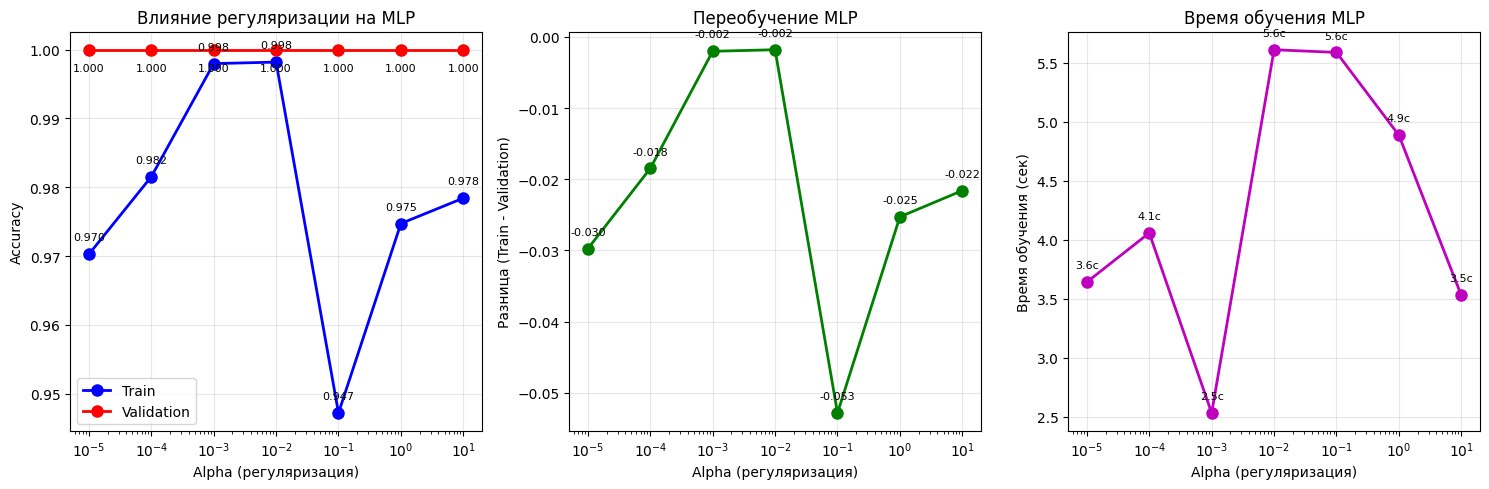

In [10]:
#2 
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
mlp_alpha_val_acc = []
mlp_alpha_train_acc = []
train_times = []

for i, alpha in enumerate(alphas, 1):
    print(f"\n{i}. Alpha = {alpha}")
    
    mlp = MLPClassifier(alpha=alpha, random_state=42, max_iter=1000, hidden_layer_sizes=(100,))
    
    start_time = time.time()
    mlp.fit(X_trains, Y_train)
    training_time = time.time() - start_time
    
    y_train_pred = mlp.predict(X_trains)
    y_val_pred = mlp.predict(X_valds)
    
    train_acc = accuracy_score(Y_train, y_train_pred)
    val_acc = accuracy_score(Y_vald, y_val_pred)
    
    mlp_alpha_train_acc.append(train_acc)
    mlp_alpha_val_acc.append(val_acc)
    train_times.append(training_time)
    
    print(f" Train Accuracy: {train_acc:.4f}")
    print(f" Validation Accuracy: {val_acc:.4f}")
    print(f" Время обучения: {training_time:.2f} сек")

best_alpha_idx = np.argmax(mlp_alpha_val_acc)
best_alpha = alphas[best_alpha_idx]
print(f"\n Best alpha: {best_alpha}")
print(f" Validation Accuracy: {mlp_alpha_val_acc[best_alpha_idx]:.4f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(alphas, mlp_alpha_train_acc, 'bo-', linewidth=2, markersize=8, label='Train')
plt.plot(alphas, mlp_alpha_val_acc, 'ro-', linewidth=2, markersize=8, label='Validation')
plt.xscale('log')
plt.xlabel('Alpha (регуляризация)')
plt.ylabel('Accuracy')
plt.title('Влияние регуляризации на MLP')
plt.legend()
plt.grid(True, alpha=0.3)

for i, (alpha, train_acc, val_acc) in enumerate(zip(alphas, mlp_alpha_train_acc, mlp_alpha_val_acc)):
    plt.annotate(f'{train_acc:.3f}', (alpha, train_acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    plt.annotate(f'{val_acc:.3f}', (alpha, val_acc), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)

plt.subplot(1, 3, 2)
gaps_mlp = [train - val for train, val in zip(mlp_alpha_train_acc, mlp_alpha_val_acc)]
plt.plot(alphas, gaps_mlp, 'go-', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Alpha (регуляризация)')
plt.ylabel('Разница (Train - Validation)')
plt.title('Переобучение MLP')
plt.grid(True, alpha=0.3)

for i, (alpha, gap) in enumerate(zip(alphas, gaps_mlp)):
    plt.annotate(f'{gap:.3f}', (alpha, gap), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.subplot(1, 3, 3)
plt.plot(alphas, train_times, 'mo-', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Alpha (регуляризация)')
plt.ylabel('Время обучения (сек)')
plt.title('Время обучения MLP')
plt.grid(True, alpha=0.3)

for i, (alpha, time_val) in enumerate(zip(alphas, train_times)):
    plt.annotate(f'{time_val:.1f}с', (alpha, time_val), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.show()


1. Solver = lbfgs
 Train Accuracy: 0.9997
 Validation Accuracy: 1.0000
 Время обучения: 72.91 сек

2. Solver = sgd
 Train Accuracy: 0.9453
 Validation Accuracy: 1.0000
 Время обучения: 10.86 сек

3. Solver = adam
 Train Accuracy: 0.9815
 Validation Accuracy: 1.0000
 Время обучения: 3.91 сек

 Best solver: lbfgs
 Validation Accuracy: 1.0000


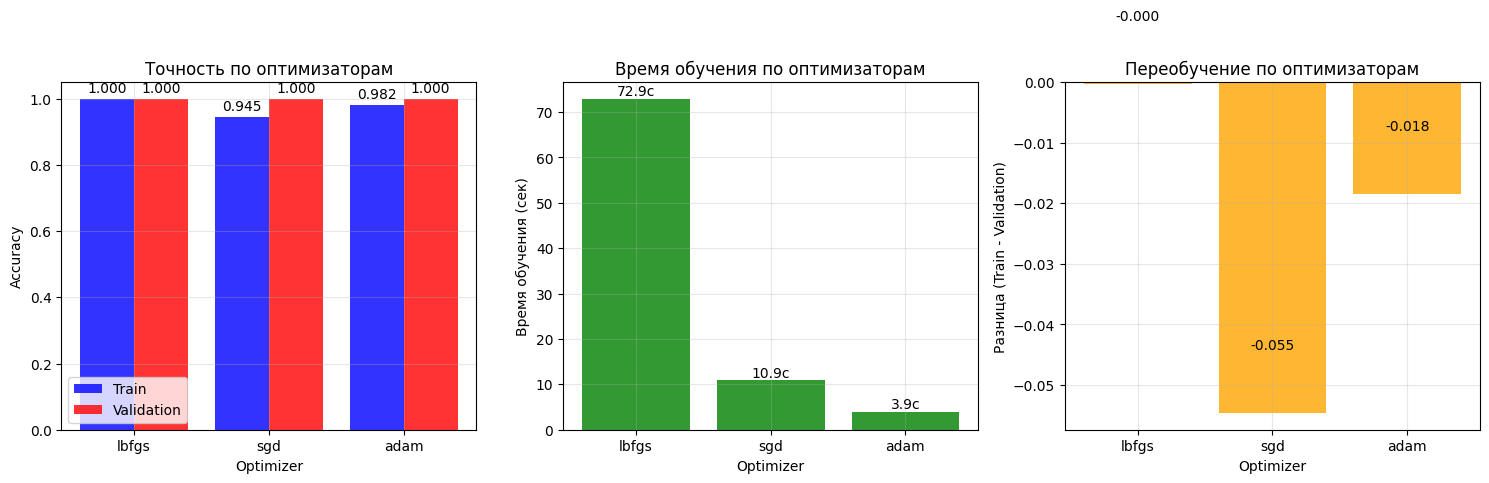

In [11]:
#3
solvers = ['lbfgs', 'sgd', 'adam']
mlp_solv_val_acc = []
mlp_solv_train_ac = []
solver_train_times = []

for i, solver in enumerate(solvers, 1):
    print(f"\n{i}. Solver = {solver}")
    
    mlp = MLPClassifier(solver=solver, random_state=42, max_iter=1000, hidden_layer_sizes=(100,))
    
    start_time = time.time()
    mlp.fit(X_trains, Y_train)
    train_time = time.time() - start_time
    
    y_train_pred = mlp.predict(X_trains)
    y_val_pred = mlp.predict(X_valds)
    
    train_acc = accuracy_score(Y_train, y_train_pred)
    val_acc = accuracy_score(Y_vald, y_val_pred)
    
    mlp_solv_train_ac.append(train_acc)
    mlp_solv_val_acc.append(val_acc)
    solver_train_times.append(train_time)
    
    print(f" Train Accuracy: {train_acc:.4f}")
    print(f" Validation Accuracy: {val_acc:.4f}")
    print(f" Время обучения: {train_time:.2f} сек")

best_solver_idx = np.argmax(mlp_solv_val_acc)
best_solver = solvers[best_solver_idx]
print(f"\n Best solver: {best_solver}")
print(f" Validation Accuracy: {mlp_solv_val_acc[best_solver_idx]:.4f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
x_pos = np.arange(len(solvers))
bars1 = plt.bar(x_pos - 0.2, mlp_solv_train_ac, 0.4, label='Train', alpha=0.8, color='blue')
bars2 = plt.bar(x_pos + 0.2, mlp_solv_val_acc, 0.4, label='Validation', alpha=0.8, color='red')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.title('Точность по оптимизаторам')
plt.xticks(x_pos, solvers)
plt.legend()
plt.grid(True, alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.subplot(1, 3, 2)
bars_time = plt.bar(solvers, solver_train_times, alpha=0.8, color='green')
plt.xlabel('Optimizer')
plt.ylabel('Время обучения (сек)')
plt.title('Время обучения по оптимизаторам')
plt.grid(True, alpha=0.3)

for bar in bars_time:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.1f}с', ha='center', va='bottom', fontsize=10)

plt.subplot(1, 3, 3)
gaps_solver = [train - val for train, val in zip(mlp_solv_train_ac, mlp_solv_val_acc)]
bars_gap = plt.bar(solvers, gaps_solver, alpha=0.8, color='orange')
plt.xlabel('Optimizer')
plt.ylabel('Разница (Train - Validation)')
plt.title('Переобучение по оптимизаторам')
plt.grid(True, alpha=0.3)

for bar in bars_gap:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

 Perceptron - Лучший learning rate: 0.0001
 MLP - Лучший alpha: 1e-05
 MLP - Лучший solver: lbfgs
 Perceptron:
 Базовая модель: 0.9396
 Оптимизированная: 0.9618
 Улучшение: 0.0222")

MLPClassifier:
 Базовая модель: 0.9714
 Оптимизированная: 1.0000
 Улучшение: 0.0286


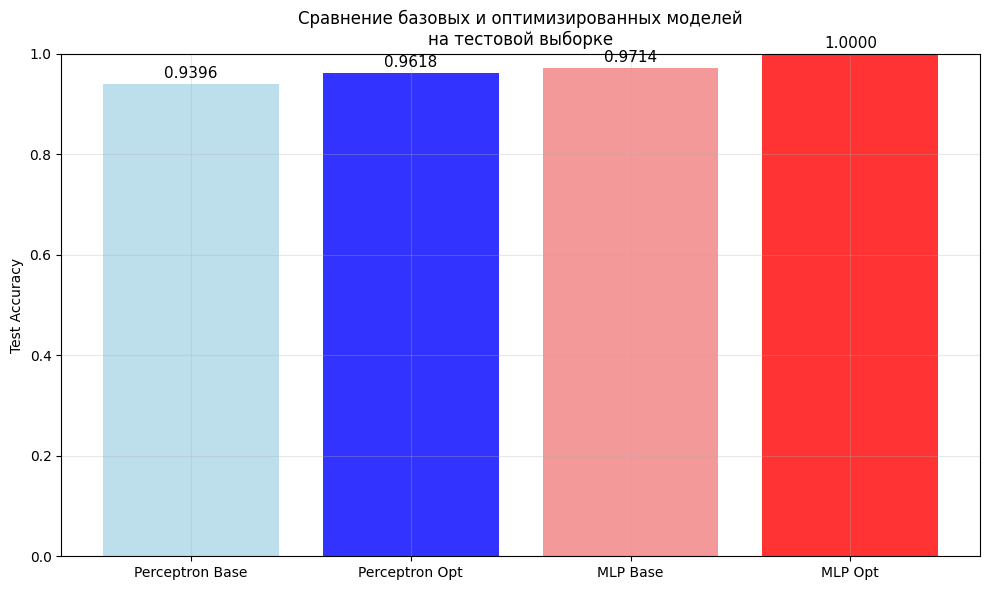

In [12]:
print(f" Perceptron - Лучший learning rate: {best_lr}")
print(f" MLP - Лучший alpha: {best_alpha}")
print(f" MLP - Лучший solver: {best_solver}")

fin_prc = Perceptron(eta0=best_lr, random_state=42, max_iter=1000)
fin_mlp = MLPClassifier(alpha=best_alpha, solver=best_solver, random_state=42, max_iter=1000, hidden_layer_sizes=(100,))

fin_prc.fit(X_trains, Y_train)
fin_mlp.fit(X_trains, Y_train)

y_test_fin_prc = fin_prc.predict(X_tests)
y_test_fin_mlp = fin_mlp.predict(X_tests)

prc_test_acc = accuracy_score(Y_test, y_testo_pred)
fin_prc_test_acc = accuracy_score(Y_test, y_test_fin_prc)

base_mlp_test_acc = accuracy_score(Y_test, y_testt_pred)
fin_mlp_test_acc = accuracy_score(Y_test, y_test_fin_mlp)

print(f""" Perceptron:\n Базовая модель: {prc_test_acc:.4f}\n Оптимизированная: {fin_prc_test_acc:.4f}\n Улучшение: {fin_prc_test_acc - prc_test_acc:.4f}")\n
MLPClassifier:\n Базовая модель: {base_mlp_test_acc:.4f}\n Оптимизированная: {fin_mlp_test_acc:.4f}\n Улучшение: {fin_mlp_test_acc - base_mlp_test_acc:.4f}""")

models = ['Perceptron Base', 'Perceptron Opt', 'MLP Base', 'MLP Opt']
accuracies = [prc_test_acc, fin_prc_test_acc, base_mlp_test_acc, fin_mlp_test_acc]

plt.figure(figsize=(10, 6))
colors = ['lightblue', 'blue', 'lightcoral', 'red']
bars = plt.bar(models, accuracies, color=colors, alpha=0.8)

plt.ylabel('Test Accuracy')
plt.title('Сравнение базовых и оптимизированных моделей\nна тестовой выборке')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.005,
            f'{acc:.4f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()